# Two IEA15MW turbines: Instantaneous planes 7x2

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                 #'/ccs/proj/cfd162/lcheung/amr-wind-frontend.lcc/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/'
                ]
import sys, os, shutil, io
for x in amrwindfedirs: sys.path.insert(1, x)

import matplotlib.pyplot as plt
# Make all plots inline 
%matplotlib inline

In [2]:
import postproengine as ppeng	
import ruamel.yaml    
yaml = ruamel.yaml.YAML(typ='rt')
Loader= yaml.load
loaderkwargs = {}
dumperkwargs = {}

In [3]:
ALM_BD_dir='/lustre/orion/cfd162/world-shared/lcheung/ALCC_Frontier_WindFarm/farmruns/LowWS_LowTI/ABL_FSI_7x2/rundir_ALM_beamdyn'
ALM_ED_dir='/lustre/orion/cfd162/world-shared/lcheung/ALCC_Frontier_WindFarm/farmruns/LowWS_LowTI/ABL_FSI_7x2/rundir_ALM_elastodyn'
FSI_ED_dir='/lustre/orion/cfd162/world-shared/lcheung/ALCC_Frontier_WindFarm/farmruns/LowWS_LowTI/ABL_FSI_7x2/twoturbine_iea15mw_lowTI_lowWS_7x2_prod.flight'
time='{time-17500:0.2f}'

In [4]:
yamlstring="""
globalattributes:
  verbose: True
  #udfmodules:
  #- testmod.py
  executeorder:
  - workflow1

# This is a template anchor meant to be copied over
instantplotstuff: &iplotanchor
  #plotfunc: "lambda db,i: db['velocityx'][i]"
  xscalefunc: 'lambda x: (x-2280.0)/240.0'
  yscalefunc: 'lambda y: (y-1000.0)/240.0'
  fontsize: 8
  xlabel: 'x/D'
  ylabel: 'y/D'
  clevels: 'np.linspace(0, 10, 101)'
  #postplotfunc: postproengine.postplot

instantplotstuffXZ: &XZiplotanchor
  #plotfunc: "lambda db,i: db['velocityx'][i]"
  xscalefunc: 'lambda x: (x-2280.0)/240.0'
  yscalefunc: 'lambda y: (y)/240.0'
  fontsize: 8
  xlabel: 'x/D'
  ylabel: 'z/D'
  clevels: 'np.linspace(0, 10, 101)'
  axisscale: 
  
workflow1:
  instantaneousplanes:
  - name: ALM_ED_instantXY
    ncfile: {ALM_ED_dir}/post_processing/XY_35000.nc
    times: [17660 ] #[ 17633 ]
    iters: [-1]
    xaxis: x
    yaxis: y
    iplane: 1
    plot:
      << : *iplotanchor
      title: 'ALM Elastodyn T={time}s'
      figname: fig1
      axesnumfunc: 'lambda i: 0'
  - name: ALM_BD_instantXY
    ncfile: {ALM_BD_dir}/post_processing/XY_48000.nc
    times: [ 17660 ]
    iters: [ -1 ]
    xaxis: x
    yaxis: y
    iplane: 1
    plot:
      << : *iplotanchor
      title: 'ALM Beamdyn T={time}s'
      figname: fig1
      axesnumfunc: 'lambda i: 2'
  - name: FSI_ED_instantXY
    ncfile: {FSI_ED_dir}/post_processing/XY_61500.nc
    times: [ 17660 ]
    iters: [-1]
    xaxis: x
    yaxis: y
    iplane: 1
    plot:
      << : *iplotanchor
      title: 'FSI Elastodyn T={time}s'
      figname: fig1
      axesnumfunc: 'lambda i: 4'

  - name: ALM_ED_instantXZ
    ncfile: {ALM_ED_dir}/post_processing/XZ_35000.nc
    times: [17660 ] #[ 17633 ]
    iters: [-1]
    xaxis: x
    yaxis: z
    iplane: 0
    plot:
      << : *XZiplotanchor
      title: 'ALM Elastodyn T={time}s'
      figname: fig1
      axesnumfunc: 'lambda i: 1'
  - name: ALM_BD_instantXZ
    ncfile: {ALM_BD_dir}/post_processing/XZ_48000.nc
    times: [ 17660 ]
    iters: [ -1 ]
    xaxis: x
    yaxis: z
    iplane: 0
    plot:
      << : *XZiplotanchor
      title: 'ALM Beamdyn T={time}s'
      figname: fig1
      axesnumfunc: 'lambda i: 3'
  - name: FSI_ED_instantXZ
    ncfile: {FSI_ED_dir}/post_processing/XZ_61500.nc
    times: [ 17660 ]
    iters: [-1]
    xaxis: x
    yaxis: z
    iplane: 0
    plot:
      << : *XZiplotanchor
      title: 'FSI Elastodyn T={time}s'
      figname: fig1
      axesnumfunc: 'lambda i: 5'
"""
f = io.StringIO(yamlstring.format(**vars()))
yamldict = Loader(f, **loaderkwargs)


Initialized instantaneousplanes
Running instantaneousplanes
extracting iter 320
Initialized plot inside instantaneousplanes
Executing plot
extracting iter 333
Initialized plot inside instantaneousplanes
Executing plot
extracting iter 220
Initialized plot inside instantaneousplanes
Executing plot
extracting iter 320
Initialized plot inside instantaneousplanes
Executing plot
extracting iter 333
Initialized plot inside instantaneousplanes
Executing plot
extracting iter 220
Initialized plot inside instantaneousplanes
Executing plot


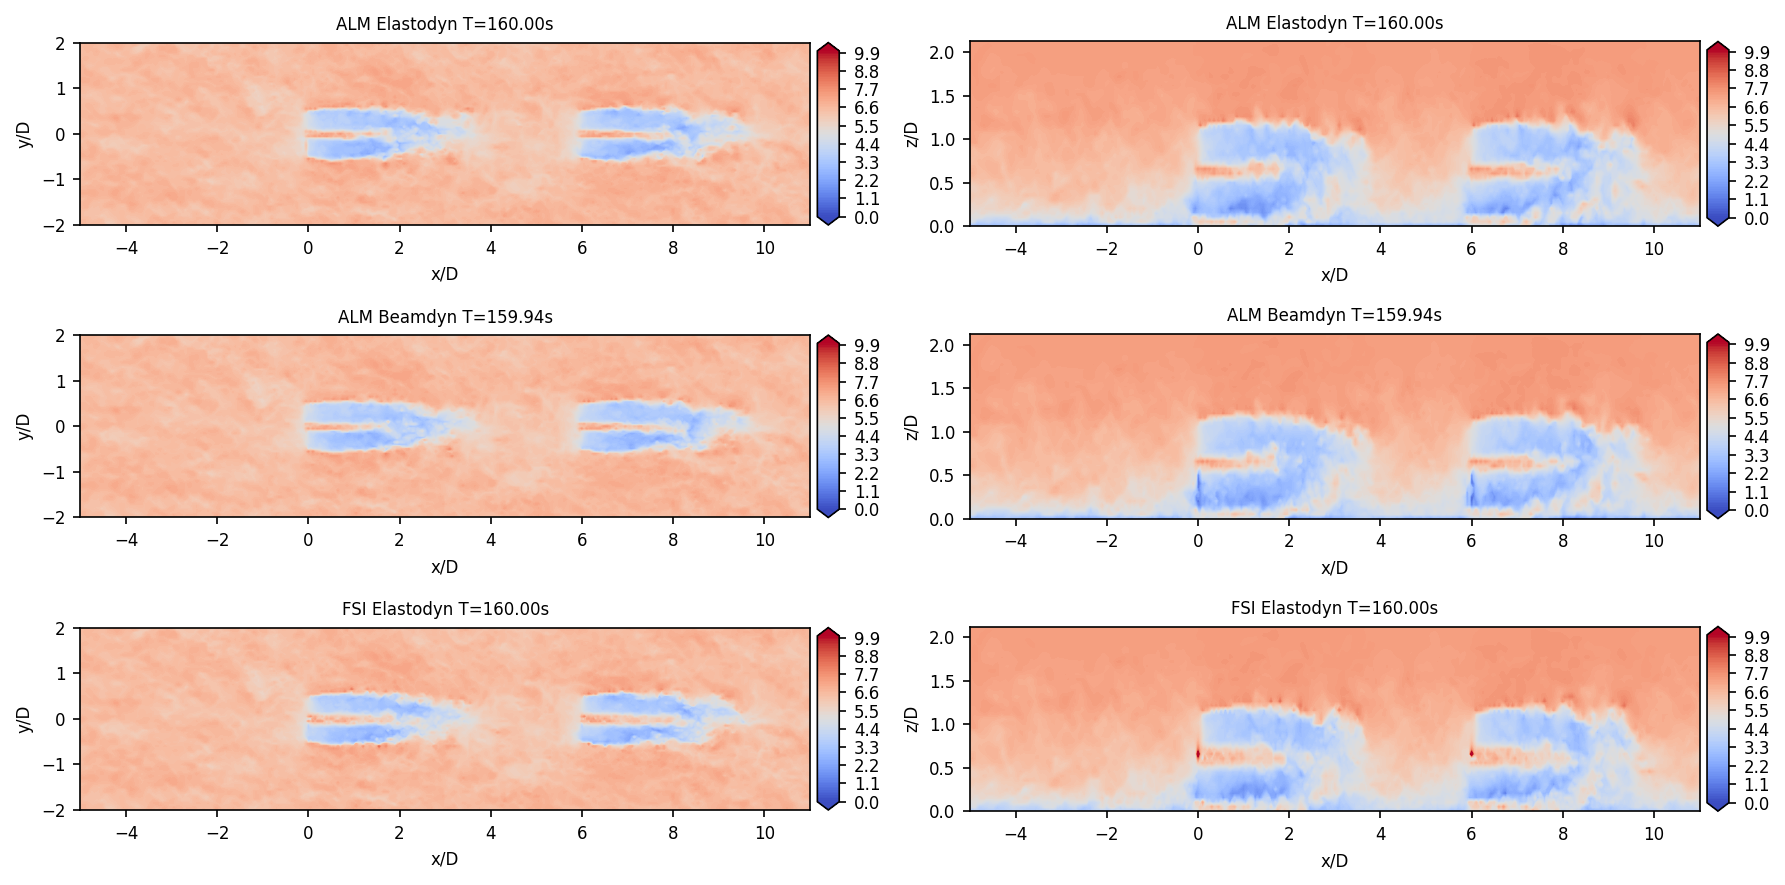

In [5]:
fig, axs = plt.subplots(3,2, figsize=(12,6), num="fig1", dpi=150)
# Run the driver
ppeng.driver(yamldict)
plt.tight_layout()
#plt.savefig(figdir+'/TripleDecompositionExample.png')